<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/n4369i3g2fkg38kendjtcbw6hzm4vel5.png" width = 100, align = "center"></a>

<h1 align=center><font size = 5>Lab 3: Creating and Querying Database Objects from R</h1>

<br>

### Welcome!

For this lab we are using the data set from: 
https://www.ontario.ca/data/ontario-public-schools-enrolment.
This comes as a single file with both the board and school data.
For simplicity we have already split it into two separate files: board.csv and school.csv . 

Prior to starting the lab ensure you have download the data set files and placed them in the "/resources/data/samples/osb/" folder under My Data.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Tasks</h3>
<ol><ol><ol>
<li><a href="#ref4a">Pre-requisites</a></li>
<li><a href="#ref4b">Load RODBC</a></li>
<li><a href="#ref4c">Create a database connection</a></li>
<li><a href="#ref4d">Create a connection string and connect to the database</a></li>
<li><a href="#ref4e">View database and driver information</a></li>
<li><a href="#ref4f">Create the tables</a></li>
<li><a href="#ref4g">Load data into the database</a></li>
<li><a href="#ref4h">Fetch data from the database</a></li>
<li><a href="#ref4i">Plot the data (using ggplot2)</a></li>
<li><a href="#ref4j">Dis-connect</a></li>
</ol></ol></ol>
<br>
Estimated Time Needed: <strong>30 min</strong>
</div>

<a id="ref4a"></a>
### a. Pre-requisites
In this lab we will use RStudio IDE within CC Labs to access data in a Db2 Warehouse on Cloud database (previously called dashDB) using RODBC. Information about these services is provided in the lab setup.

For this lab we will utilize the Ontario public schools enrollment dataset. This data set is available under the Open Government License – Ontario and sourced from:

https://www.ontario.ca/data/ontario-public-schools-enrolment


<a id="ref4b"></a>
### b. Load RODBC

The RODBC package and the ODBC driver for Db2 Warehouse are pre-installed on your workbench. Let’s create a new cell and load the RODBC package by typing the following command and executing it (Ctrl+Enter):

In [1]:
#load the RODBC library
library(RODBC);

<div align="left">
<a href="#tipb" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipb" class="collapse"><br>
  
```
# Fill in the ...
library(...)
```
  
</div>

<div align="left">
<a href="#solb" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solb" class="collapse"><br>
  
```
library(RODBC);
```
  
</div>

<a id="ref4c"></a>
### c. Create a database connection

In [2]:
#Enter the values for you database connection
#Ensure you update the values for hostname, uid, and pwd

# The following is copied from Lab 2b
# dsn_driver = "com.ibm.db2.jcc.DB2Driver"    # NOTE: This line is from Lab2a and is not in the Db2 credentials info
dsn_driver <- "{IBM DB2 ODBC Driver}"         # NOTE: This appears to be an alternative way to specify the ODBC driver
dsn_database = "BLUDB"            # e.g. "BLUDB"      # all of the credentials info is under the section ("dsn":) near the bottom
dsn_hostname = "dashdb-entry-yp-dal10-01.services.dal.bluemix.net"   # e.g. replace <yourhostname> with your hostname, e.g., "Db2 Warehouse01.datascientstworkbench.com"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_uid = "dash100497"              # e.g. replace <userid> with your userid
dsn_pwd = "8_dKQbPO_j0o"            # e.g. replace <password> with your password

<div align="left">
<a href="#tipc" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipc" class="collapse"><br>
  
```
# Fill in the ...
dsn_driver <- "{IBM DB2 ... Driver}"
dsn_database <- "..."           
dsn_hostname <- "YOUR....DB.HOSTNAME" 
dsn_port <- "..."                
dsn_protocol <- "..."           
dsn_uid <- "YOUR.USERNAME"        
dsn_pwd <- "YOUR.PASSWORD"   
```
  
</div>

<div align="left">
<a href="#solc" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solc" class="collapse"><br>
  
```
#Enter the values for you database connection
#Ensure you update the values for hostname, uid, and pwd
dsn_driver <- "{IBM DB2 ODBC Driver}"
dsn_database <- "BLUDB"            # e.g. "BLUDB"
dsn_hostname <- "YOUR.DASHDB.HOSTNAME" # e.g.: "awh-yp-small03.services.dal.bluemix.net"
dsn_port <- "50000"                # e.g. "50000" 
dsn_protocol <- "TCPIP"            # i.e. "TCPIP"
dsn_uid <- "YOUR.USERNAME"         # e.g. "dash104434"
dsn_pwd <- "YOUR.PASSWORD"         # e.g. "7dBZ39xN6$o0JiX!m"
```
  
</div>

<a id="ref4d"></a>
### d. Create a connection string and connect to the database

In [3]:
conn_path <- paste("DRIVER=",dsn_driver,
                  ";DATABASE=",dsn_database,
                  ";HOSTNAME=",dsn_hostname,
                  ";PORT=",dsn_port,
                  ";PROTOCOL=",dsn_protocol,
                  ";UID=",dsn_uid,
                  ";PWD=",dsn_pwd,sep="")
conn <- odbcDriverConnect(conn_path)
conn

RODBC Connection 1
Details:
  case=nochange
  DRIVER={IBM DB2 ODBC DRIVER}
  UID=dash100497
  PWD=******
  DATABASE=BLUDB
  HOSTNAME=dashdb-entry-yp-dal10-01.services.dal.bluemix.net
  PORT=50000
  PROTOCOL=TCPIP

<div align="left">
<a href="#tipd" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipd" class="collapse"><br>
  
```
# Fill in the ...
conn_path <- paste("DRIVER=",...,
                  ";DATABASE=",...,
                  ";HOSTNAME=",...,
                  ";PORT=",...,
                  ";PROTOCOL=",...,
                  ";UID=",...,
                  ";PWD=",dsn_...,...="")
conn <- odbcDriverConnect(conn_path)
conn
```
  
</div>

<div align="left">
<a href="#sold" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="sold" class="collapse"><br>
  
```
conn_path <- paste("DRIVER=",dsn_driver,
                  ";DATABASE=",dsn_database,
                  ";HOSTNAME=",dsn_hostname,
                  ";PORT=",dsn_port,
                  ";PROTOCOL=",dsn_protocol,
                  ";UID=",dsn_uid,
                  ";PWD=",dsn_pwd,sep="")
conn <- odbcDriverConnect(conn_path)
conn
```
  
</div>

<a id="ref4e"></a>
### e. View database and driver information

In [4]:
#View database and driver information
sql.info <- sqlTypeInfo(conn)
conn.info <- odbcGetInfo(conn)
conn.info["DBMS_Name"]
conn.info["DBMS_Ver"]
conn.info["Driver_ODBC_Ver"]

DBMS_Name 
"DB2/LINUXX8664"

DBMS_Ver 
"11.01.0009"

Driver_ODBC_Ver 
        "03.51"

<div align="left">
<a href="#tipe" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipe" class="collapse"><br>
  
```
# Fill in the ...
sql.... <- sql...(conn)
conn.... <- odbc...(conn)
conn....["..._Name"]
conn....["..._Ver"]
conn....["Driver_..._Ver"]
conn
```
  
</div>

<div align="left">
<a href="#sole" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="sole" class="collapse"><br>
  
```
#View database and driver information
sql.info <- sqlTypeInfo(conn)
conn.info <- odbcGetInfo(conn)
conn.info["DBMS_Name"]
conn.info["DBMS_Ver"]
conn.info["Driver_ODBC_Ver"]
```
  
</div>

<a id="ref4f"></a>
### f. Create the tables

You will need to *remove* the BOARD and SCHOOL tables in case they already exist.

In [5]:
myschema <- "DASH107657"
tables <- c("BOARD", "SCHOOL")

    for (table in tables){  
      # Drop School table if it already exists
      out <- sqlTables(conn, tableType = "TABLE", schema = myschema, tableName =table)
      if (nrow(out)>0) {
        err <- sqlDrop (conn, paste(myschema,".",table,sep=""), errors=FALSE)  
        if (err==-1){
          cat("An error has occurred.\n")
          err.msg <- odbcGetErrMsg(conn)
          for (error in err.msg) {
            cat(error,"\n")
          }
        } else {
          cat ("Table: ",  myschema,".",table," was dropped\n")
        }
      } else {
          cat ("Table: ",  myschema,".",table," does not exist\n")
      }
    }

Table:  DASH107657 . BOARD  does not exist
Table:  DASH107657 . SCHOOL  does not exist


<div align="left">
<a href="#tipf1" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipf1" class="collapse"><br>
  
```
myschema <- "..."
tables <- c("...", "...L")
    
    for (table in ...){  
      # Drop ... table if it already exists
      out <- sql...(conn, table... = "...", schema = my..., ...Name =table)
      if (nrow(...)>0) {
        err <- sql... (conn, paste(my...,".",...,...=""), errors=...)  
        if (err==-1){
          ...("An error has occurred.\n")
          err.... <- odbc...Msg(conn)
          for (error in ....msg) {
            cat(...,"\n")
          }
        } else {
          cat ("...: ",  my...,".",table," was ...\n")
        }
      } else {
          cat ("...: ",  my...,".",table," does not ...\n")
      }
    }
```
  
</div>

<div align="left">
<a href="#solf1" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solf1" class="collapse"><br>
  
```
myschema <- "DASH107657"
tables <- c("BOARD", "SCHOOL")
    
    for (table in tables){  
      # Drop School table if it already exists
      out <- sqlTables(conn, tableType = "TABLE", schema = myschema, tableName =table)
      if (nrow(out)>0) {
        err <- sqlDrop (conn, paste(myschema,".",table,sep=""), errors=FALSE)  
        if (err==-1){
          cat("An error has occurred.\n")
          err.msg <- odbcGetErrMsg(conn)
          for (error in err.msg) {
            cat(error,"\n")
          }
        } else {
          cat ("Table: ",  myschema,".",table," was dropped\n")
        }
      } else {
          cat ("Table: ",  myschema,".",table," does not exist\n")
      }
    }
```
  
</div>

Let’s create the BOARD table in the database.

In [6]:
df1 <- sqlQuery(conn, "CREATE TABLE BOARD (
                            B_ID CHAR(6) NOT NULL, 
                            B_NAME VARCHAR(75) NOT NULL, 
                            TYPE VARCHAR(50) NOT NULL, 
                            LANGUAGE VARCHAR(50), 
                            PRIMARY KEY (B_ID))", 
                errors=FALSE)

<div align="left">
<a href="#tipf2" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipf2" class="collapse"><br>
  
```
# Fill in the ...
df1 <- sql...(conn, "CREATE ... BOARD (
                            B_ID ...(6) NOT ..., 
                            B_NAME ...(75) NOT ..., 
                            TYPE ...(50) NOT ..., 
                            LANGUAGE ...(50), 
                            ... KEY (B_ID))", 
                ...=FALSE)
```
  
</div>

<div align="left">
<a href="#solf2" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solf2" class="collapse"><br>
  
```
df1 <- sqlQuery(conn, "CREATE TABLE BOARD (
                            B_ID CHAR(6) NOT NULL, 
                            B_NAME VARCHAR(75) NOT NULL, 
                            TYPE VARCHAR(50) NOT NULL, 
                            LANGUAGE VARCHAR(50), 
                            PRIMARY KEY (B_ID))", 
                errors=FALSE)
```
  
</div>

Check if successful

In [7]:
if (df1 == -1){
  cat ("An error has occurred.\n")
  msg <- odbcGetErrMsg(conn)
  print (msg)
} else {
  cat ("Table was created successfully.\n")
}

Table was created successfully.


<div align="left">
<a href="#tipf3" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipf3" class="collapse"><br>
  
```
# Fill in the ...
if (... == -1){
  cat ("An ... has occurred.\n")
  msg <- odbc...Msg(conn)
  print (...)
} else {
  cat ("Table was ... ....\n")
}
```
  
</div>

<div align="left">
<a href="#solf3" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solf3" class="collapse"><br>
  
```
if (df1 == -1){
  cat ("An error has occurred.\n")
  msg <- odbcGetErrMsg(conn)
  print (msg)
} else {
  cat ("Table was created successfully.\n")
}
```
  
</div>

Now let’s create the SCHOOL table.

In [8]:
df2 <- sqlQuery(conn, "CREATE TABLE SCHOOL (
                  B_ID CHAR(6) NOT NULL, 
                  S_ID CHAR(6) NOT NULL, 
                  S_NAME VARCHAR(50), 
                  LEVEL VARCHAR(70), 
                  ENROLLMENT INTEGER WITH DEFAULT 10,
                  PRIMARY KEY (B_ID, S_ID))", errors=FALSE)

<div align="left">
<a href="#tipf4" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipf4" class="collapse"><br>
  
```
# Fill in the ...
df2 <- sql...(conn, "CREATE ... SCHOOL (
                  B_ID ...(6) NOT NULL, 
                  S_ID ...(6) NOT NULL, 
                  S_NAME ...(50), 
                  LEVEL ...(70), 
                  ENROLLMENT ... WITH ... 10,
                  PRIMARY ... (B_ID, S_ID))", ...=FALSE)
```
  
</div>

<div align="left">
<a href="#solf4" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solf4" class="collapse"><br>
  
```
df2 <- sqlQuery(conn, "CREATE TABLE SCHOOL (
                  B_ID CHAR(6) NOT NULL, 
                  S_ID CHAR(6) NOT NULL, 
                  S_NAME VARCHAR(50), 
                  LEVEL VARCHAR(70), 
                  ENROLLMENT INTEGER WITH DEFAULT 10,
                  PRIMARY KEY (B_ID, S_ID))", errors=FALSE)
```
  
</div>

Check if successful.

In [9]:
if (df1 == -1){
  cat ("An error has occurred.\n")
  msg <- odbcGetErrMsg(conn)
  print (msg)
} else {
  cat ("Table was created successfully.\n")
}


Table was created successfully.


<div align="left">
<a href="#tipf5" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipf5" class="collapse"><br>
  
```
# Fill in the ...
if (... == -1){
  cat ("An ... has occurred.\n")
  msg <- odbc...Msg(conn)
  print (...)
} else {
  cat ("Table was ... ....\n")
}
```
  
</div>

<div align="left">
<a href="#solf5" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solf5" class="collapse"><br>
  
```
if (df1 == -1){
  cat ("An error has occurred.\n")
  msg <- odbcGetErrMsg(conn)
  print (msg)
} else {
  cat ("Table was created successfully.\n")
}
```
  
</div>

<a id="ref4g"></a>
### g. Load the data into the database

Create the dataframe from the database data.

In [10]:
tab.frame <- sqlTables(conn, schema=myschema)
nrow(tab.frame)
tab.frame$TABLE_NAME

[1] 0

character(0)

<div align="left">
<a href="#tipg1" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg1" class="collapse"><br>
  
```
# Fill in the ...
tab.... <- sql...(conn, ...=myschema)
n...(tab....)
tab....$..._NAME
```
  
</div>

<div align="left">
<a href="#solg1" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg1" class="collapse"><br>
  
```
tab.frame <- sqlTables(conn, schema=myschema)
nrow(tab.frame)
tab.frame$TABLE_NAME
```
  
</div>

Print columns 4, 6, 7, and 18.

In [11]:
# Read the board.csv file
for (table in tables){  
        cat ("\nColumn info for table", table, ":\n")
        col.detail <- sqlColumns(conn, table)
        print(col.detail[c(4,6,7,18)], row.names=FALSE)
}


Column info for table BOARD :
 COLUMN_NAME TYPE_NAME COLUMN_SIZE IS_NULLABLE
        B_ID      CHAR           6          NO
      B_NAME   VARCHAR          75          NO
        TYPE   VARCHAR          50          NO
    LANGUAGE   VARCHAR          50         YES

Column info for table SCHOOL :
 COLUMN_NAME TYPE_NAME COLUMN_SIZE IS_NULLABLE
        B_ID      CHAR           6          NO
        S_ID      CHAR           6          NO
      S_NAME   VARCHAR          50         YES
       LEVEL   VARCHAR          70         YES
  ENROLLMENT   INTEGER          10         YES


<div align="left">
<a href="#tig2" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tig2" class="collapse"><br>
  
```
# Fill in the ...
for (table in ...){  
        cat ("\n... info for table", ..., ":\n")
        col.detail <- sqlColumns(conn, ...)
        print(col....[c(4,6,7,18)], row....=FALSE)
}
```
  
</div>

<div align="left">
<a href="#solg2" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg2" class="collapse"><br>
  
```
for (table in tables){  
        cat ("\nColumn info for table", table, ":\n")
        col.detail <- sqlColumns(conn, table)
        print(col.detail[c(4,6,7,18)], row.names=FALSE)
}
```
  
</div>

Load the data from the board.csv into the BOARD dataframe.

In [12]:
boarddf <- read.csv("/resources/data/samples/osb/board.csv", header = FALSE)

<div align="left">
<a href="#tipg3" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg3" class="collapse"><br>
  
```
# Fill in the ...
board... <- ....csv("/resources/.../samples/.../board.csv", header = ...)
```
  
</div>

<div align="left">
<a href="#solg3" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg3" class="collapse"><br>
  
```
boarddf <- read.csv("/resources/data/samples/osb/board.csv", header = FALSE)
```
  
</div>

Display initial data from the BOARD dataframe.

In [13]:
head(boarddf)

V1,V2,V3,V4
B28010,Algoma DSB,Public,English
B67202,Algonquin and Lakeshore CDSB,Roman Catholic,English
B66010,Avon Maitland DSB,Public,English
B66001,Bluewater DSB,Public,English
B67164,Brant Haldimand Norfolk CDSB,Roman Catholic,English
B67008,Bruce-Grey CDSB,Roman Catholic,English


<div align="left">
<a href="#tipg4" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg4" class="collapse"><br>
  
```
# Fill in the ...
...(board...)
```
  
</div>

<div align="left">
<a href="#solg4" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg4" class="collapse"><br>
  
```
head(boarddf)
```
  
</div>

<a id="ref4h"></a>
### h. Fetch data from the database

Fetch the BOARD data.

In [14]:
sqlSave(conn, boarddf, "BOARD", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE)

<div align="left">
<a href="#tipg5" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg5" class="collapse"><br>
  
```
# Fill in the ...
sql...(conn, ...df, "BOARD", ...=TRUE, ...=FALSE, row...=FALSE, col...=FALSE)
```
  
</div>

<div align="left">
<a href="#solg5" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg5" class="collapse"><br>
  
```
sqlSave(conn, boarddf, "BOARD", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE)
```
  
</div>

Fetch the data from the BOARD database and display some rows from the end of the data.

In [15]:
boarddb <- sqlFetch(conn, "BOARD")
tail(boarddb)

,B_ID,B_NAME,TYPE,LANGUAGE
71,B67148,Waterloo CDSB,Roman Catholic,English
72,B66176,Waterloo Region DSB,Public,English
73,B67130,Wellington CDSB,Roman Catholic,English
74,B67024,Windsor-Essex CDSB,Roman Catholic,English
75,B67075,York CDSB,Roman Catholic,English
76,B66095,York Region DSB,Public,English


<div align="left">
<a href="#tipg6" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg6" class="collapse"><br>
  
```
# Fill in the ...
...db <- sql...(conn, "...")
...(board...)
```
  
</div>

<div align="left">
<a href="#solg6" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg6" class="collapse"><br>
  
```
boarddb <- sqlFetch(conn, "BOARD")
tail(boarddb)
```
  
</div>

Create the dataframe from the SCHOOL data.

In [16]:
schooldf <- read.csv("/resources/data/samples/osb/school.csv", header = FALSE)

<div align="left">
<a href="#tipg7" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg7" class="collapse"><br>
  
```
# Fill in the ...
school... <- ....csv("/resources/.../samples/osb/....csv", ... = FALSE)
```
  
</div>

<div align="left">
<a href="#solg7" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg7" class="collapse"><br>
  
```
schooldf <- read.csv("/resources/data/samples/osb/school.csv", header = FALSE)
```
  
</div>

Display some records from the beginning of the dataframe.

In [17]:
head(schooldf)

V1,V2,V3,V4,V5
B28010,891240,Alexander Henry HS,Secondary,145
B28010,902344,Algoma Education Connection SS,Secondary,385
B28010,19186,Anna McCrea PS,Elementary,177
B28010,67679,Arthur Henderson PS,Elementary,104
B28010,28932,Aweres PS,Elementary,95
B28010,43362,Ben R McMullin PS,Elementary,241


<div align="left">
<a href="#tipg8" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg8" class="collapse"><br>
  
```
# Fill in the ...
...(school...)
```
  
</div>

<div align="left">
<a href="#solg8" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg8" class="collapse"><br>
  
```
head(schooldf)
```
  
</div>

Display some records from the end of the dataframe.

In [18]:
tail(schooldf)

,V1,V2,V3,V4,V5
4894,B66095,634565,Windham Ridge PS,Elementary,846
4895,B66095,549380,Wismer PS,Elementary,511
4896,B66095,954292,Woodbridge College,Secondary,985
4897,B66095,617318,Woodbridge PS,Elementary,504
4898,B66095,618896,Woodland PS,Elementary,442
4899,B66095,624101,Yorkhill E S,Elementary,293


<div align="left">
<a href="#tipg9" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg9" class="collapse"><br>
  
```
# Fill in the ...
...(school...)
```
  
</div>

<div align="left">
<a href="#solg9" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg9" class="collapse"><br>
  
```
tail(schooldf)
```
  
</div>

Create the dataframe from the school database.

In [19]:
schooldf$V3 <- iconv(schooldf$V3, "latin1", "ASCII//TRANSLIT")

<div align="left">
<a href="#tipg10" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg10" class="collapse"><br>
  
```
# Fill in the ...
...df$V3 <- i...(...df$V3, "latin1", "ASCII//TRANSLIT")
```
  
</div>

<div align="left">
<a href="#solg10" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg10" class="collapse"><br>
  
```
schooldf$V3 <- iconv(schooldf$V3, "latin1", "ASCII//TRANSLIT")
```
  
</div>

Copy the data from the database to the dataframe.

In [20]:
# NOTE: This may take a long time because of the large size of the database
# When there is lot of data to insert in the database it may be faster
#   to use the native LOAD utility of the database instead of through R

# NOTE: This took several minutes to finish running
sqlSave(conn, schooldf, "SCHOOL", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE)

<div align="left">
<a href="#tipg11" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg11" class="collapse"><br>
  
```
# Fill in the ...
sql...(conn, school..., "SCHOOL", append=..., fast=..., row...=FALSE, col...=FALSE)
```
  
</div>

<div align="left">
<a href="#solg11" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg11" class="collapse"><br>
  
```
#NOTE: This may take a long time because of the large size of the database
#When there is lot of data to insert in the database it may be faster
#  to use the native LOAD utility of the database instead of through R
sqlSave(conn, schooldf, "SCHOOL", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE)
```
  
</div>

Get the data from the SCHOOL database.

In [21]:
schooldb <- sqlFetch(conn, "SCHOOL")
tail(schooldb)

,B_ID,S_ID,S_NAME,LEVEL,ENROLLMENT
4894,B67040,697567,Christ the King Catholic S,Elementary,138
4895,B67040,708003,Georges P Vanier Catholic S,Elementary,242
4896,B67040,842249,Good Shepherd Catholic S,Elementary,137
4897,B67040,710970,Gregory A Hogan Catholic S,Elementary,292
4898,B67040,715492,Holy Family Catholic S,Elementary,262
4899,B67040,719269,Holy Rosary Catholic S,Elementary,122


<div align="left">
<a href="#tipg12" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg12" class="collapse"><br>
  
```
# Fill in the ...
...db <- sql...(conn, "...")
tail(...db)
```
  
</div>

<div align="left">
<a href="#solg12" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg12" class="collapse"><br>
  
```
schooldb <- sqlFetch(conn, "SCHOOL")
tail(schooldb)
```
  
</div>

<a id="ref4i"></a>
### i. Plot the data (using ggplot2)

In [22]:
#Load the ggplot2 library
library(ggplot2);

<div align="left">
<a href="#tipm1" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipm1" class="collapse"><br>
  
```
# Fill in the ...
...(gg...2);
```
  
</div>

<div align="left">
<a href="#solm1" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solm1" class="collapse"><br>
  
```
library(ggplot2);
```
  
</div>

Get the elementary school data from the database from both tables in descending sequence.

In [23]:
elequery <- query <- paste("select s.enrollment as ENROLLMENT 
from school s, board b 
where b.b_name = 'Toronto DSB' and b.b_id=s.b_id 
and s.level = 'Elementary' 
order by enrollment desc")

<div align="left">
<a href="#tipm2" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipm2" class="collapse"><br>
  
```
# Fill in the ...
...query <- ... <- paste("... s.enrollment as ... 
from ... s, ... b 
where b.b_... = 'Toronto DSB' and b.b_id=s.... 
and ....level = 'Elementary' 
order by ... desc")
```
  
</div>

<div align="left">
<a href="#solm2" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solm2" class="collapse"><br>
  
```
elequery <- query <- paste("select s.enrollment as ENROLLMENT 
from school s, board b 
where b.b_name = 'Toronto DSB' and b.b_id=s.b_id 
and s.level = 'Elementary' 
order by enrollment desc")
```
  
</div>

create the elementary school dataframe.

In [24]:
eledf <- sqlQuery(conn, elequery)
dim(eledf)

[1] 476   1

<div align="left">
<a href="#tipm3" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipm3" class="collapse"><br>
  
```
# Fill in the ...
ele... <- sql...(conn, ...query)
dim(...df)
```
  
</div>

<div align="left">
<a href="#solm3" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solm3" class="collapse"><br>
  
```
eledf <- sqlQuery(conn, elequery)
dim(eledf)
```
  
</div>

Create a density plot of elementary school enrollments.

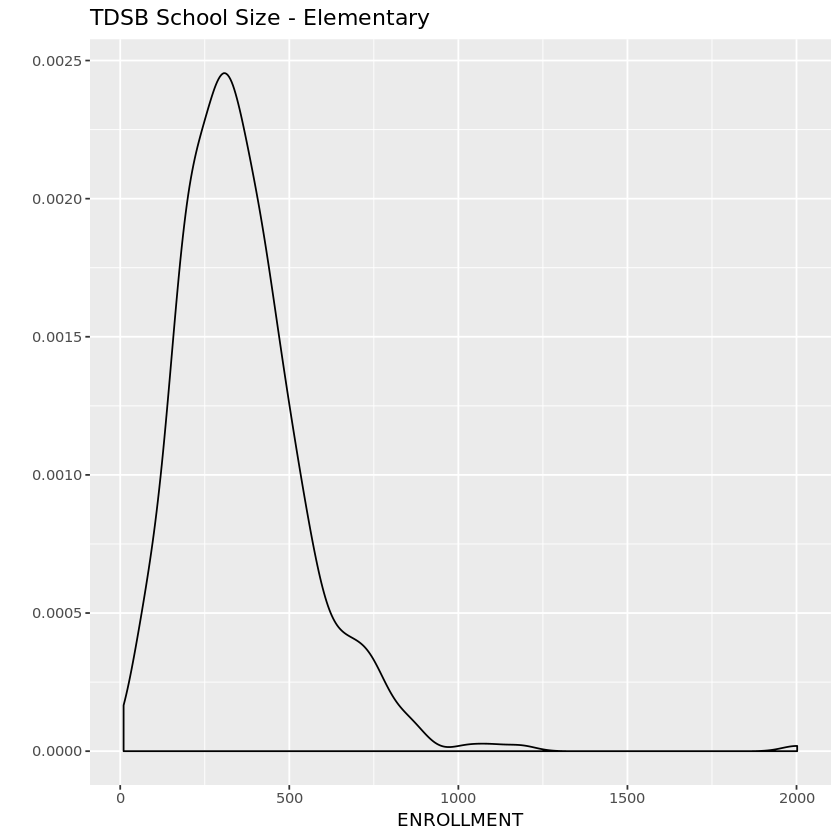

In [25]:
qplot(ENROLLMENT, data=eledf, geom="density",  main="TDSB School Size - Elementary")

<div align="left">
<a href="#tipm4" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipm4" class="collapse"><br>
  
```
# Fill in the ...
q...(ENROLLMENT, ...=eledf, ...="density",  ...="TDSB School Size - ...")
```
  
</div>

<div align="left">
<a href="#solm4" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solm4" class="collapse"><br>
  
```
qplot(ENROLLMENT, data=eledf, geom="density",  main="TDSB School Size - Elementary")
```
  
</div>

Create the secondary school enrollments query in descending sequence.

In [26]:
secquery <- paste("select s.enrollment as ENROLLMENT 
from school s, board b 
where b.b_name = 'Toronto DSB' and b.b_id=s.b_id 
and s.level = 'Secondary' 
order by enrollment desc")

<div align="left">
<a href="#tipm5" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipm5" class="collapse"><br>
  
```
# Fill in the ...
sec... <- paste("... s.enrollment as ... 
from ... s, board b 
where b.b_... = 'Toronto ...' and b.b_id=s.... 
and s.... = 'Secondary' 
order by ... desc")
```
  
</div>

<div align="left">
<a href="#solm5" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solm5" class="collapse"><br>
  
```
secquery <- paste("select s.enrollment as ENROLLMENT 
from school s, board b 
where b.b_name = 'Toronto DSB' and b.b_id=s.b_id 
and s.level = 'Secondary' 
order by enrollment desc")
```
  
</div>

Create the dataframe using the data in the database.

In [27]:
secdf <- sqlQuery(conn, secquery)

<div align="left">
<a href="#tipm6" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipm6" class="collapse"><br>
  
```
# Fill in the ...
secdf <- sql...(conn, sec...)
```
  
</div>

<div align="left">
<a href="#solm6" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solm6" class="collapse"><br>
  
```
secdf <- sqlQuery(conn, secquery)
```
  
</div>

Create a density plot of secondary school enrollments.

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”

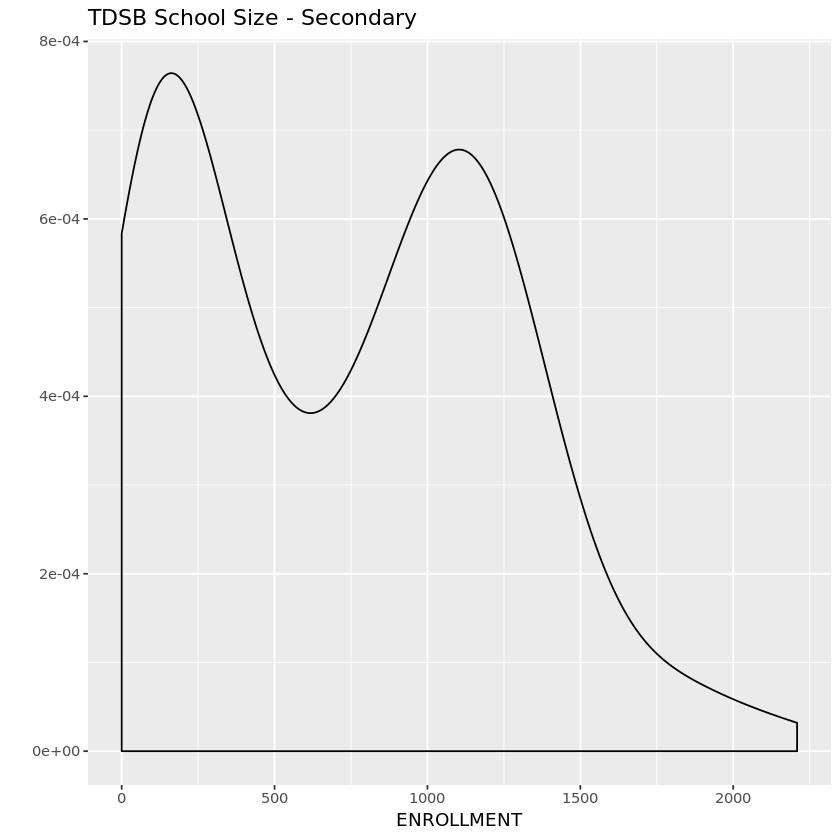

In [28]:
qplot(ENROLLMENT, data=secdf, geom="density", main="TDSB School Size - Secondary")

<div align="left">
<a href="#tipm7" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipm7" class="collapse"><br>
  
```
# Fill in the ...
q...(ENROLLMENT, ...=secdf, ...="density", ...="TDSB School Size - ...")
```
  
</div>

<div align="left">
<a href="#solm7" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solm7" class="collapse"><br>
  
```
qplot(ENROLLMENT, data=secdf, geom="density", main="TDSB School Size - Secondary")
```
  
</div>

Query the BOARD database for enrollments.

In [29]:
denquery <- paste("select b.b_name, s.s_name, level as LEVEL, enrollment 
 from board b, school s where b.b_id = s.b_id and b.b_name = 'Toronto DSB'")

<div align="left">
<a href="#tipm8" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipm8" class="collapse"><br>
  
```
# Fill in the ...
den... <- paste("select b.b_..., s.s_..., level as ..., ... 
 from board b, ... s where b.... = s.b_id and b.b_... = 'Toronto DSB'")
```
  
</div>

<div align="left">
<a href="#solm8" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solm8" class="collapse"><br>
  
```
denquery <- paste("select b.b_name, s.s_name, level as LEVEL, enrollment 
 from board b, school s where b.b_id = s.b_id and b.b_name = 'Toronto DSB'")
```
  
</div>

Query the database.

In [30]:
dendf <- sqlQuery(conn, denquery)

<div align="left">
<a href="#tipm9" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipm9" class="collapse"><br>
  
```
# Fill in the ...
d...f <- sql...(conn, den...)
```
  
</div>

<div align="left">
<a href="#solm9" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solm9" class="collapse"><br>
  
```
dendf <- sqlQuery(conn, denquery)
```
  
</div>

Create a box plot of enrollements in elementary and secondary schools in Toronto.

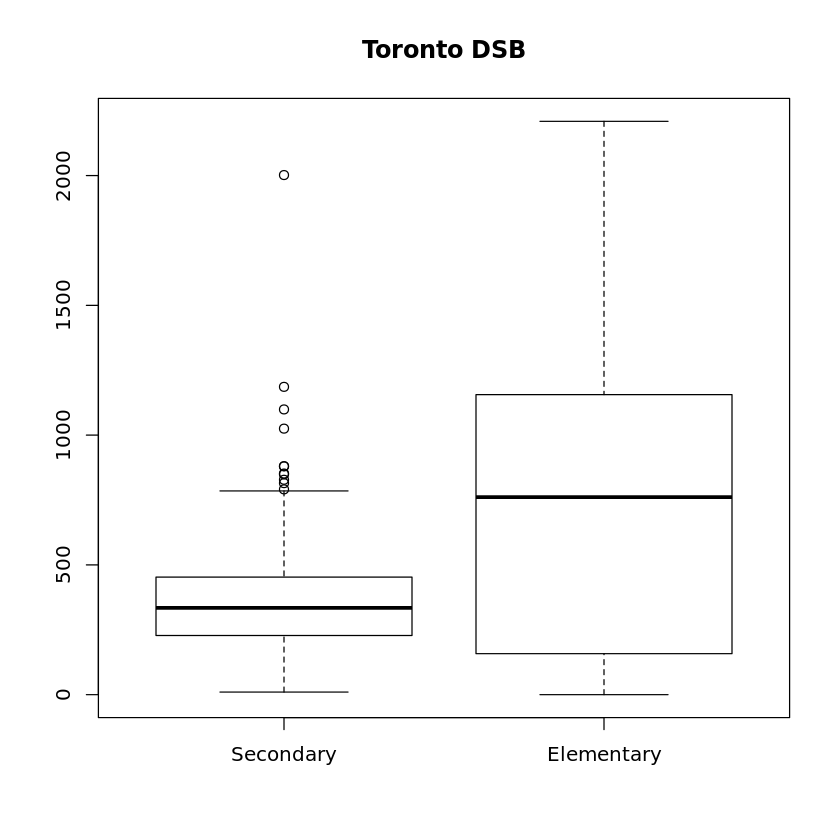

In [31]:
dendf$LEVEL <- as.factor(dendf$LEVEL)
boxplot(ENROLLMENT ~ LEVEL, dendf, names =c("Secondary","Elementary"), main="Toronto DSB")

<div align="left">
<a href="#tipm10" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipm10" class="collapse"><br>
  
```
# Fill in the ...
d...f$LEVEL <- as....(d...f$LEVEL)
box...(ENROLLMENT ~ ..., d...f, names =c("...","..."), ...="Toronto DSB")
```
  
</div>

<div align="left">
<a href="#solm10" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solm10" class="collapse"><br>
  
```
dendf$LEVEL <- as.factor(dendf$LEVEL)
boxplot(ENROLLMENT ~ LEVEL, dendf, names =c("Secondary","Elementary"), main="Toronto DSB")
```
  
</div>

<a id="ref4j"></a>
### j. Dis-connect

Finally, as a best practice we should close the database connection once we're done with it.

In [32]:
close(conn)

<div align="left">
<a href="#tipi" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipi" class="collapse"><br>
  
```
# Fill in the ...
...(conn)
```
  
</div>

<div align="left">
<a href="#soli" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="soli" class="collapse"><br>
  
```
close(conn)
```
  
</div>

<a id="ref4o"></a>
### Summary

In this lab you created and queried database objects from an R notebook in Jupyter, and you used ggplot2 to plot the data using R libraries.

This notebook is part of the free course on Cognitive Class called *Using R with Databases*. If you accessed this notebook outside the course, you can take this free self-paced course, online by going to: https://cognitiveclass.ai/courses/using-r-with-databases/

<hr>
<h3>Tell your friends that you're taking the Using R with Database course!</h3>

<script type="text/javascript" async src="https://platform.twitter.com/widgets.js"></script>

<a href=https://twitter.com/intent/tweet?url=https%3A%2F%2Fgoo.gl%2Fb6kJAj&via=bigdatau&text=I%20can%20now%20program%20in%20R!%20I%20finished%20this%20R%20course%20on%20IBM%27s%20Big%20Data%20University!&hashtags=rstats%2Cdatascience&related=bigdatau>
<textarea name="textarea1" disabled="disabled" style="resize:none;border-color:#00aced;color:#808080;height:80px" cols=75>Just learnt to create and query database objects from R from #jupyter notebooks Thanks @cognitiveclass</textarea></a>
<p></p><a class="twitter-share-button" data-size=large href=https://twitter.com/intent/tweet?url=https%3A%2F%2Fgoo.gl%2Fb6kJAj&via=bigdatau&text=I%20can%20now%20program%20in%20R!%20I%20finished%20this%20R%20course%20on%20IBM%27s%20Big%20Data%20University!&hashtags=rstats%2Cdatascience&related=bigdatau></a>

<a href=https://twitter.com/intent/tweet?text=Just+learnt+to+create+and+query+database+objects+from+R+from+%23jupyter+notebooks+Thanks+%40BigDataU>Tweet Now!</a>

#### Thank you for completing this module on creating and querying database objects from R.

<hr>
### About the Authors:  
Hi! It's [Rav Ahuja](https://ca.linkedin.com/in/rav-ahuja-8aa4562a) and [Agatha Colangelo](https://www.linkedin.com/in/agathacolangelo), the authors of this notebook. We hope you found this Lab on creating and querying database objects from R interesting and easy to do! There's lots more to learn about R and Relational Databases but you're well on your way. Feel free to connect with us if you have any questions.
<hr>

Copyright &copy; 2017 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).